In [3]:
import numpy as np

#generiamo 1000 punti 2d random
num_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples)

#uniamo i due array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#generiamo target_labels, un array che contiene 0 o 1 se input[i] appartiene alla classe 0 o 1
target_labels = np.vstack((np.zeros((num_samples,1),dtype="float32"), np.ones((num_samples,1), dtype="float32")))


Adesso plottiamo i dati con matplotlib:

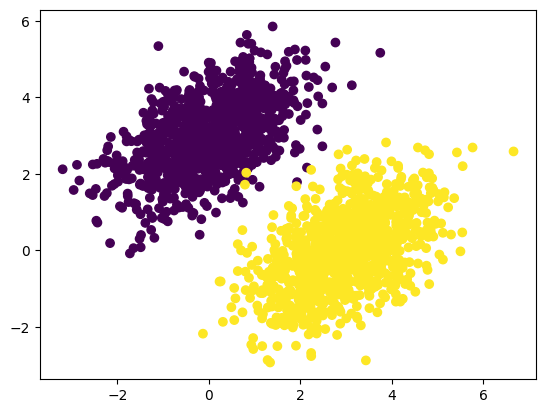

In [5]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=target_labels[:,0])
plt.show()

Creiamo quindi un classificatore lineare che impara a separare questi blobs:

In [12]:
import tensorflow as tf

#prediction = W dot input + b
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs,W)+b

def square_loss(targets,predictions):
    per_sample_losses = tf.square(target_labels - predictions)
    return tf.reduce_mean(per_sample_losses)

Il prossimo step è l'addestramento:

In [23]:
# Esempio: regressione lineare y = XW + b
W = tf.Variable(tf.random.normal(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def square_loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

learning_rate = 0.1

@tf.function
def training_step(X, y):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(X, W) + b        # <— W e b usati nella loss
        loss = square_loss(y_pred, y)
    dW, db = tape.gradient(loss, [W, b])     # <— gradienti non-None
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)
    return loss

for step in range(50): 
    loss = training_step(inputs, target_labels) 
    print(f"Loss allo step {step}: {loss:.4f}")


Loss allo step 0: 15.8468
Loss allo step 1: 0.1492
Loss allo step 2: 0.0619
Loss allo step 3: 0.0507
Loss allo step 4: 0.0476
Loss allo step 5: 0.0455
Loss allo step 6: 0.0436
Loss allo step 7: 0.0420
Loss allo step 8: 0.0405
Loss allo step 9: 0.0391
Loss allo step 10: 0.0379
Loss allo step 11: 0.0367
Loss allo step 12: 0.0357
Loss allo step 13: 0.0347
Loss allo step 14: 0.0339
Loss allo step 15: 0.0331
Loss allo step 16: 0.0323
Loss allo step 17: 0.0317
Loss allo step 18: 0.0311
Loss allo step 19: 0.0306
Loss allo step 20: 0.0301
Loss allo step 21: 0.0296
Loss allo step 22: 0.0292
Loss allo step 23: 0.0288
Loss allo step 24: 0.0285
Loss allo step 25: 0.0282
Loss allo step 26: 0.0279
Loss allo step 27: 0.0276
Loss allo step 28: 0.0274
Loss allo step 29: 0.0272
Loss allo step 30: 0.0270
Loss allo step 31: 0.0268
Loss allo step 32: 0.0266
Loss allo step 33: 0.0265
Loss allo step 34: 0.0263
Loss allo step 35: 0.0262
Loss allo step 36: 0.0261
Loss allo step 37: 0.0260
Loss allo step 38: 0.

Plottiamo le nostre predictions:

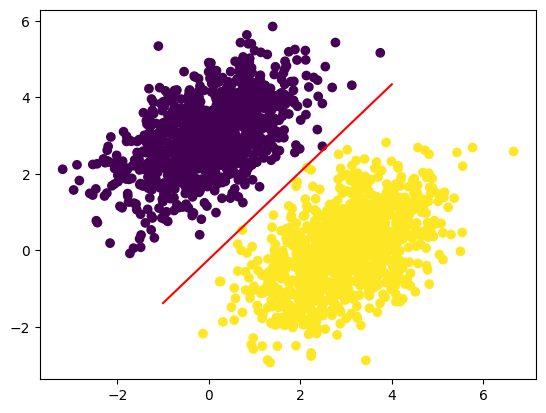

In [24]:
predictions = model(inputs)
x=np.linspace(-1,4,100)
y= -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x,y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()